The objective of this lab is to design a method to measure the flow rate of a low-speed fan with a Pitot tube. Your report should address the potential issues of your method and discuss ways to address these issues if you were given more time and a better "wind tunnel". 

This notebook is intended to help you with the theoretical part. 

## Pitot tube velocity and uncertainty

The available Pitot tube is connected to a digital manometer with a reading uncertainty $\sigma_{\Delta P}=\pm0.001\;\mathrm{kPa}$. The velocity is derived from Bernouilli's equation,

$$
U = \sqrt{\frac{2\Delta P}{\rho}}
$$

which also defines the pressure difference as a function of velocity (to be used later).
$$
\sqrt{\Delta P}=U\sqrt{\frac{\rho}{2}}
$$

The velocity as a function of the pressure difference is shown in the following plot.



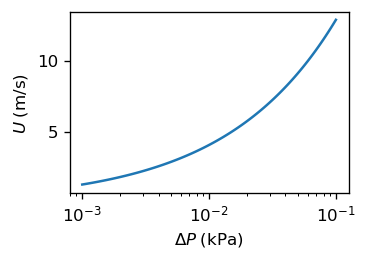

In [41]:
import numpy as np
import matplotlib.pyplot as plt
rho = 1.2
sigma_P = 0.001e3
def U(Dp):
    global rho
    return np.sqrt(2*Dp/rho)
def sigma_U_DP(Dp):
    global rho,sigma_P
    return sigma_P/np.sqrt(2*rho*Dp)
def sigma_U_U(U):
    global rho,sigma_P
    return sigma_P/(rho*U)
Dp = np.logspace(-3,-1,100)*1e3
Ua = U(Dp)
plt.figure(figsize=(3,2),dpi=120)
plt.semilogx(Dp*1e-3,Ua)
plt.xlabel(r"$\Delta P\;(\mathrm{kPa})$ ")
plt.ylabel(r"$U\;(\mathrm{m/s})$ ")
plt.savefig("velocity_Dp.png")
plt.show()


## Theory-driven design.

The goal of the "wind tunnel" is to channel the flow into an orifice. Conservation of mass dictates that the flow will accelerated. The question is how fast should our flow be, for the measurement to be reliable. This decision must be made on the basis of the uncertainty of $U$.

$$
\sigma_U = \sigma_P\sqrt{\frac{2}{\rho}}\frac{1}{2\sqrt{\Delta P}}=\frac{\sigma_P}{\rho U}
$$
The following two figures are showing the errobars of $U$ and the relative error $\sigma_U/U$ as function of $U$. You can therefore chose an orifice diameter to fit a relative error you deem acceptable. 

You can use one of the orifice to measure the velocity. The orifice is thin, therefore you can assume the velocity if constant, i.e. it is the bulk velocity. You now have the bulk velocity of the fan.

However, the presence of the "wind tunnel" and orifice create head losses which affect the flow rate of the fan. You are not asked to determine the coefficient of loss of system but you are asked to estimate it for at least two different orifices. To do so, you can use the equation for restriction meters (see lab head loss in pipe flow)

$$
\dot{Q}=C_d\pi R^2\sqrt{\frac{2\Delta P_{orifice}}{\rho(1-\beta^4)}}
$$

The knowledge of the $\Delta P_{orifice}$ can inform the coefficient of loss
$$
K=\frac{\Delta P_{orifice}}{\frac{1}{2}\rho U_{orifice}^2}
$$
You may compare the two head loss and discuss how you would design an experiment to evala

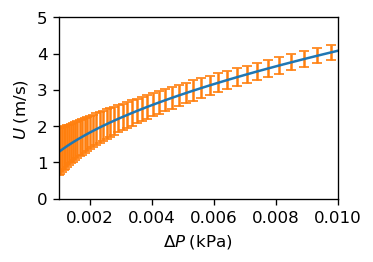

In [40]:
plt.figure(figsize=(3,2),dpi=120)
sigU = sigma_U_DP(Dp)
ax = plt.axes()
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.errorbar(Dp*1e-3,Ua,yerr=sigU,capsize=3,ecolor="C1")
plt.xlabel(r"$\Delta P\;(\mathrm{kPa})$ ")
plt.ylabel(r"$U\;(\mathrm{m/s})$ ")
plt.xlim(0.001,0.01)
plt.ylim(0,5)
plt.savefig("velocity_errobar.png")
plt.show()


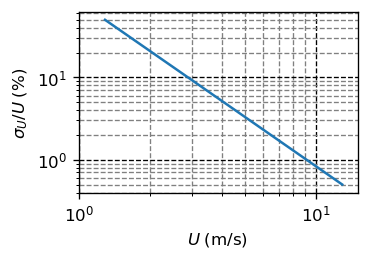

In [39]:
relerror = sigU/Ua
plt.figure(figsize=(3,2),dpi=120)
plt.loglog(Ua,relerror*100)
plt.ylabel(r"$\sigma_U/U\;(\mathrm{\%})$ ")
plt.xlabel(r"$U\;(\mathrm{m/s})$ ")
plt.grid(True,which='major', color='k', linestyle='--')
plt.grid(True,which='minor', color='gray', linestyle='--')
plt.xlim(1,15)
plt.savefig("relative_error.png")
plt.show()

## 

In [27]:
Dp = 0.001e3
U(Dp)

1.2909944487358056

In [9]:
sigma_U_DP(Dp)

0.19462473604038075

In [10]:
sigma_U_U(U(Dp))

0.19462473604038072

In [11]:
Dp = 0.008e3
U(Dp)

3.6514837167011076